# Content

This notebook contains

- injection/recovery of multiperiodic flares from simulated light curves
- analysis of the results
- visualization of the results
- the code to generate the 5x5 figure in the paper

In [227]:
# basics
import pandas as pd
import numpy as np

# constants and units
from astropy.constants import R_sun, M_sun, G, k_B, m_p
import astropy.units as u

# flare search
from altaipony.flarelc import FlareLightCurve

# modulation model, flare model
from funcs.model import full_model_coupled, aflare

# Plot stuff
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D

import matplotlib 
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14) 

font = {'family' : 'courier',
        'weight' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)


# timestamp
import time
metatstamp = time.strftime("%d_%m_%Y", time.localtime())
from time import sleep


# folder
import os
CWD = "/".join(os.getcwd().split("/")[:-2])


# Set up a simulated flares dataset

In [228]:
flares = pd.DataFrame()

# fix parameters
Prot = .4
qlum = 1e31 *u.erg / u.s
Fth = 9.06e10 * u.erg / (u.cm**2 * u.s)
R = .15 * R_sun
median = 300.
phi_a=10.
fwhm = 4.

# create a time series
time = np.linspace(1.,43.,3200)

# convert time series to phase angle
phi = (time - 10.) / Prot * np.pi * 2.

In [291]:
# cycle through a grid of inclinations, amplitudes and latitudes

# choose noise level
noise_level = .01

for phi0 in [-.4,1.4,3.4,5.4,7.4]:
    
    for i in np.array([81., 86., 56., 39., 24.,  6.,  1., 70.]) / 180. * np.pi : 
        
        for a in [0.25, 0.5,75 1., 2.]:
            for th in np.array([45., 60.,  5., 10., 30., 99., 85., 20., 60., 70.]) / 180. * np.pi :
                
                # generate observed modulated flare
                fullmodel = full_model_coupled(phi_a, th, a, fwhm, i, phi0=phi0,
                                   phi=phi, num_pts=50, qlum=qlum,
                                   Fth=Fth, R=R, median=median)
                # add gaussian noise
                fullmodel = fullmodel + fullmodel*np.random.normal(0.00,noise_level,len(fullmodel))

                # create light curve
                flc = FlareLightCurve(time=time, detrended_flux=fullmodel,
                                      detrended_flux_err=noise_level*fullmodel)

                # set median flux value
                flc.it_med = np.full_like(time, median)

                # search the flare
                flar = flc.find_flares().flares

                # if flare is not found add empty row with input parameters
                if len(flar) == 0:
                    flar = pd.DataFrame(dict(zip(['istart', 'istop', 'cstart', 
                                         'cstop', 'tstart', 'tstop', 
                                         'ed_rec', 'ed_rec_err', 'ampl_rec', 
                                         'dur', 'total_n_valid_data_points', 
                                         'theta', "a_input", "inlc", "phi0"],
                                        [[np.nan], [np.nan], [np.nan],
                                         [np.nan], [np.nan], [np.nan],
                                         [np.nan], [np.nan], [np.nan],
                                         [np.nan], [len(time)], 
                                         [th * 180. / np.pi], [a], [i * 180. / np.pi],
                                         [phi0]])))

                # if flares are detected add the parameters to the table
                else:
                    flar["theta"] = th * 180. / np.pi
                    flar["a_input"] = a
                    flar["inlc"] = i  * 180. / np.pi
                    flar["phi0"] = phi0

                flares = flares.append(flar.sort_values(by="ampl_rec",ascending=False).iloc[0])
        sleep(10)
        print("finished ", i)
    #             plt.plot(flc.time, flc.detrended_flux)
    #             plt.xlim(10,13)
    #             plt.ylim(270,350)
        

Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.413716694115407


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.5009831567151235


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.9773843811168246


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.6806784082777886


Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.


finished  0.41887902047863906


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.10471975511965977


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.017453292519943295


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  1.2217304763960306


Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.


finished  1.413716694115407


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  1.5009831567151235


Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.9773843811168246


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 4 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.6806784082777886


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.41887902047863906


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.10471975511965977


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.017453292519943295


Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.2217304763960306


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  1.413716694115407


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.5009831567151235


Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.9773843811168246


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.6806784082777886


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.41887902047863906


Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.10471975511965977


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.017453292519943295


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  1.2217304763960306


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.413716694115407


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.5009831567151235


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.9773843811168246


Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.6806784082777886


Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.41887902047863906


Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.10471975511965977


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.017453292519943295


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  1.2217304763960306


Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  1.413716694115407


Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.5009831567151235


Found 4 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.9773843811168246


Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.6806784082777886


Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.41887902047863906


Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  0.10471975511965977


Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 3 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.


finished  0.017453292519943295


Found 3 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 2 candidate(s) in the (0,3200) gap.
Found 1 candidate(s) in the (0,3200) gap.


finished  1.2217304763960306


In [233]:
f = flares.groupby(["theta", "a_input", "inlc"])
f = f.apply(lambda x: x.sort_values(by="dur", ascending=False).iloc[0])

In [234]:
f["Protratio"] = f.dur / Prot 

In [236]:
path = "../results/model/21_12_2020_simflares_1percnoise.csv"

In [237]:
with open(path, "a") as p:
         f.to_csv(p, header=True, index=False)

# Post-analysis

In [297]:
path = "../results/model/21_12_2020_simflares_2percnoise.csv"

In [298]:
flares = pd.read_csv(path)

# Show that relative duration and amplitude cuts are appropriate

Text(0, 0.5, 'measured duration / Prot')

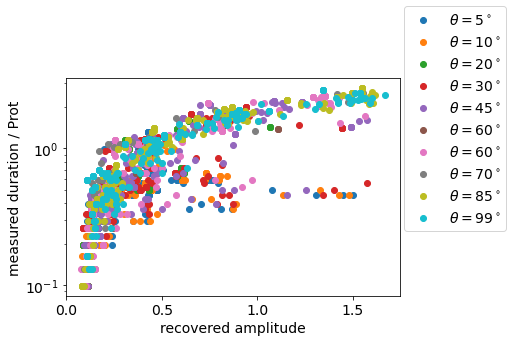

In [301]:
for l, g in flares.groupby("theta"):
    plt.scatter(g.ampl_rec, g.dur / Prot, label=fr"$\theta={l:.0f}^\circ$")
plt.yscale("log")
plt.legend(loc=(1.01,.3))
plt.xlabel("recovered amplitude")
plt.ylabel("measured duration / Prot");

# Show the recovery dependence on inclination and latitude

findfont: Font family ['courier'] not found. Falling back to DejaVu Sans.


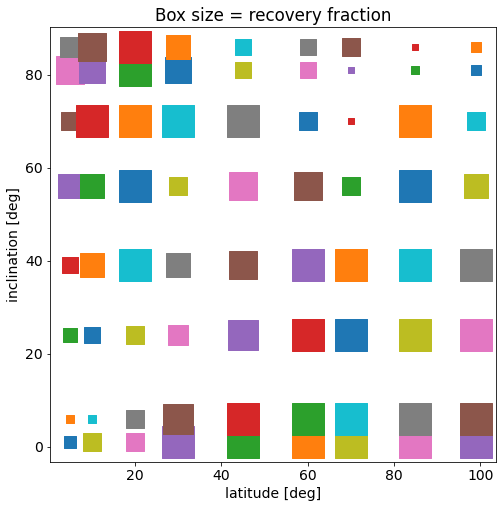

In [304]:
plt.figure(figsize=(8,8))
ff = flares[flares.a_input>.4]
for l, h in ff.groupby("theta"):
    for ll, g in h.groupby("inlc"):
        s = g[(g.ampl_rec >.2) & (g.Protratio > .15) ].shape[0]/g.shape[0]
        
        plt.scatter([l],[ll],s=(s*10)**3,marker="s")
plt.xlabel("latitude [deg]")
plt.ylabel("inclination [deg]")
plt.title("Box size = recovery fraction");

# Marginalize over inclination

(0.0, 1.0)

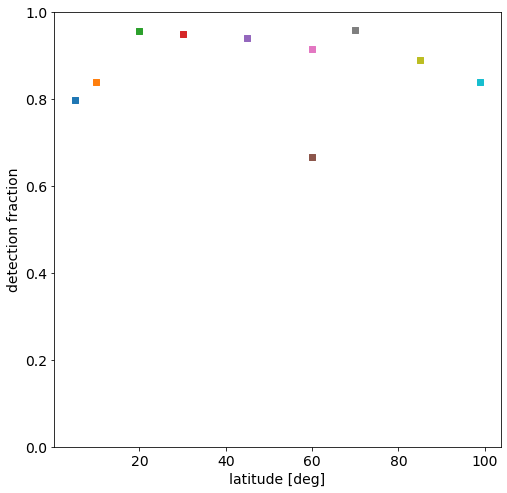

In [306]:
plt.figure(figsize=(8,8))
ff = flares[flares.a_input>.4]
for l, h in ff.groupby("theta"):
    s = h[(h.ampl_rec >.15) & (h.Protratio > .15) ].shape[0]/h.shape[0]
    plt.scatter([l],[s],marker="s")
plt.xlabel("latitude [deg]")
plt.ylabel("detection fraction")
plt.ylim(0,1)

# Create illustrative plot for paper

Found 1 candidate(s) in the (0,3600) gap.


noflares


Found 3 candidate(s) in the (0,3600) gap.
Found 2 candidate(s) in the (0,3600) gap.
Found 6 candidate(s) in the (0,3600) gap.
Found 4 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 4 candidate(s) in the (0,3600) gap.
Found 6 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 2 candidate(s) in the (0,3600) gap.
Found 3 candidate(s) in the (0,3600) gap.
Found 5 candidate(s) in the (0,3600) gap.
Found 3 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 3 candidate(s) in the (0,3600) gap.
Found 3 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 1 candidate(s) in the (0,3600) gap.
Found 2 candidate(s) in the (0,360

noflares


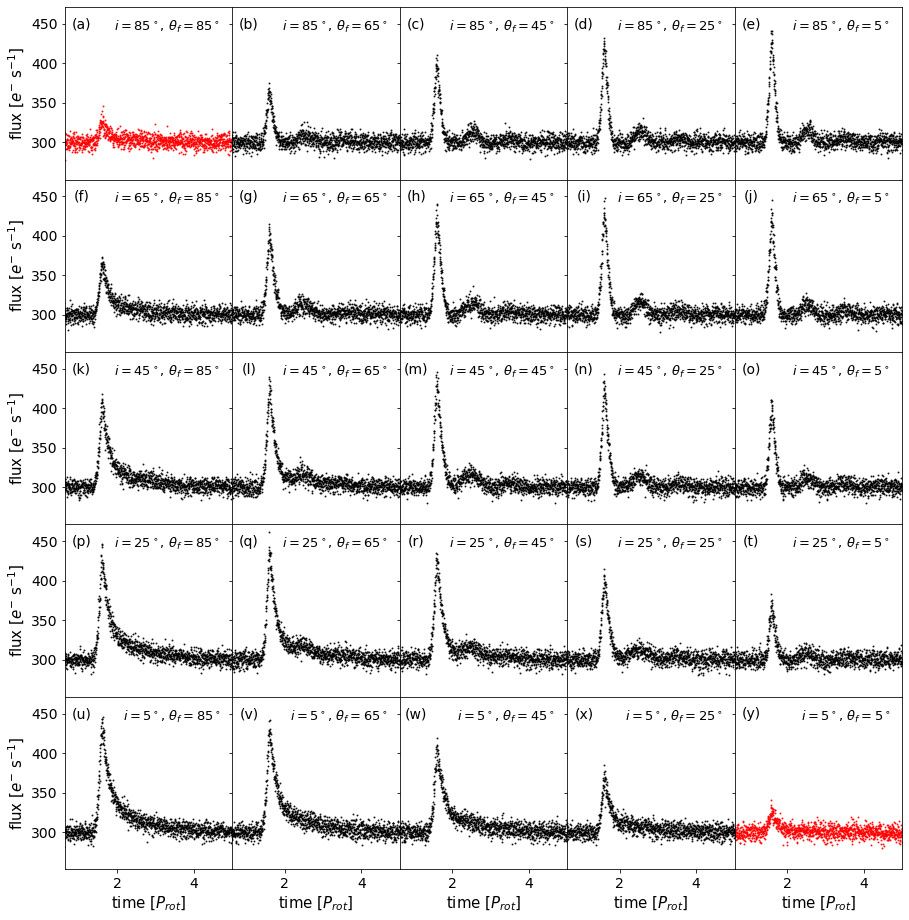

In [294]:
# Set parameters 
Prot = .4
time = np.linspace(7., 12., 3600)
phi = (time - 10.) / Prot * np.pi * 2.
qlum = 1e31 *u.erg / u.s
Fth = 9.06e10 * u.erg / (u.cm**2 * u.s)
R = .15 * R_sun
median = 300.
a = .5
phi_a=10.
fwhm = 3.2
phi0= 3.4


# Create figure, subfigure enumeration and axes labels
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(13,13), sharex=True,sharey=True, )

axes = [i for suba in axes for i in suba]

enum = list("abcdefghijklmnopqrstuvwxy")

for index in [0,5,10,15,20]:
    axes[index].set_ylabel(r"flux [$e^{-}$ s$^{-1}$]",fontsize=15)

for index in [20,21,22,23,24]:
    axes[index].set_xlabel(r"time [$P_{rot}$]",fontsize=15)    
    
    
# Cycle through different inclinations and latitudes    
for i_ in [5.,25.,45,65.,85.]:
    for theta_a in [5.,25.,45,65.,85.]:
        # Pick a subplot
        ax = axes.pop()
        
        # Convert deg to rad
        i = i_ / 180. * np.pi 
        th = theta_a / 180. * np.pi
        
        # Calculate model light curve
        fullmodel = full_model_coupled(phi_a, th, a, fwhm, i, phi0=phi0,
                           phi=phi, num_pts=50, qlum=qlum,
                           Fth=Fth, R=R, median=median)
        
        # Add 2 percent Gaussian noise
        fullmodel = fullmodel + fullmodel*np.random.normal(0.00,0.02,len(fullmodel))
        
        # Create light curve in AltaiPony
        flc = FlareLightCurve(time=time, detrended_flux=fullmodel, detrended_flux_err=.02*fullmodel)
        
        # Since you know the median, give it to the flarefinder
        flc.it_med = np.full_like(time, median)
        
        # Find flare candidates
        flar = flc.find_flares().flares
        
        # Pick only those we also keep in the paper
        flar = flar[(flar.dur>.15*Prot) & (flar.ampl_rec > .2)]
        
        # red or black, depending on detection or non-detection
        if len(flar) == 0:
            print("noflares")
            c="r"
        else:
            c="k"
            
        # Convert time in days to time in Prot and shift offset
        timeprot = time / Prot - 25.
        
        # Plot the simulated model light curve
        ax.scatter(timeprot, fullmodel, c=c, alpha=0.8,s=1)
        
        # Add a legend and a figure enumeration
        legend_elements = [Line2D([0], [0], marker='o', color='w', alpha=0,
                           label=fr"$i={i_:.0f}^\circ$, $\theta_f={theta_a:.0f}^\circ$",
                           markerfacecolor='w', markersize=5),]
        ax.legend(handles=legend_elements, fontsize=13, frameon=False)
        ax.text(0.1, 0.9, f'({enum.pop()})', horizontalalignment='center',
             verticalalignment='center', transform=ax.transAxes)
        
        # Show the same part of the light curve in every panel
        ax.set_xlim(10.25 / Prot - 25.,12 / Prot - 25.)

# Layout
plt.tight_layout()
plt.subplots_adjust(wspace=0, hspace=0)

# plt.savefig(f"/home/ekaterina/Documents/002_writing/multiperiod-flares-draft/"
#             f"nature/multiperiodflaresnature/figures/{metatstamp}_simulated_flares_25.png",
#            dpi=300)